In [4]:
pip install -r requirements.txt


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.5 MB 10.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.5 MB 7.6 MB/s eta 0:00:02
   -------------- ------------------------- 4.2/11.5 MB 6.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 6.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.5 MB 6.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.5 MB 6.4 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.5 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 6.4 MB/s eta 0:00:01
   ----------

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\Moncef\Desktop\demo\movies.csv')
df.head(5)

Matplotlib is building the font cache; this may take a moment.


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# let's see if there is any missing data
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [15]:
# Check for missing values
print(df.isnull().sum())


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [19]:
# Drop rows with missing values in the specified columns
df.dropna(subset=['rating','company' , 'released', 'score', 'votes', 'writer', 'star', 'country', 'runtime'], inplace=True)

# Check if missing values are removed
print(df.isnull().sum())


name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2101
gross        162
company        0
runtime        0
dtype: int64


In [23]:
# Impute missing values with the median for budget and gross
df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


C:\Users\Moncef\AppData\Local\Temp\ipykernel_15028\2889681802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].fillna(df['budget'].median(), inplace=True)
C:\Users\Moncef\AppData\Local\Temp\ipykernel_15028\2889681802.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [24]:
# let's check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
# change budget and gross data type to integer
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [26]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [39]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [32]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=True)

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
6793                             i am OTHER
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
Name: company, Length: 2339, dtype: object

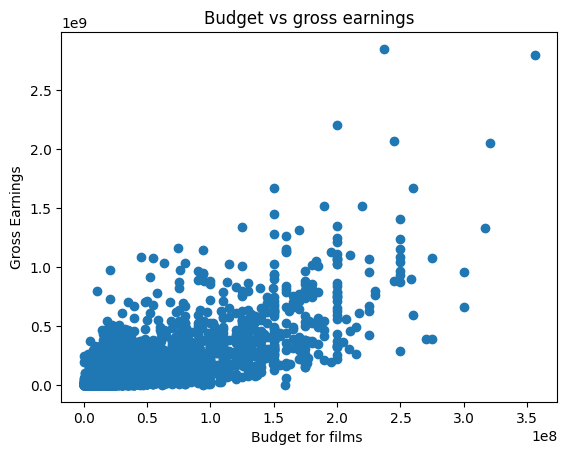

In [35]:
#scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs gross earnings')
plt.xlabel('Budget for films ')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

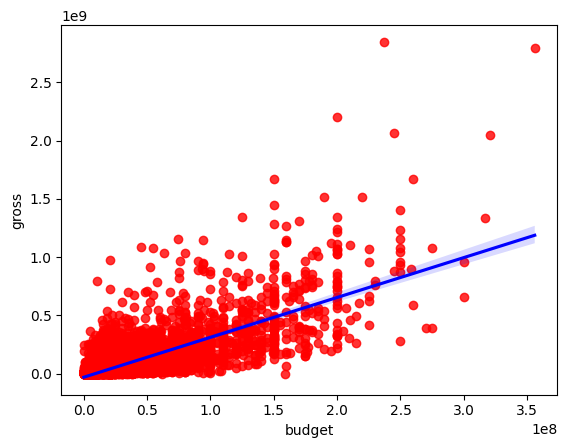

In [37]:
# plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"},line_kws={"color":"blue"})

In [47]:
# Looking at correlation
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.102346  0.226895  0.295419  0.262125  0.120676
score    0.102346  1.000000  0.411931  0.062640  0.187516  0.400574
votes    0.226895  0.411931  1.000000  0.459061  0.632325  0.309366
budget   0.295419  0.062640  0.459061  1.000000  0.745727  0.273801
gross    0.262125  0.187516  0.632325  0.745727  1.000000  0.244194
runtime  0.120676  0.400574  0.309366  0.273801  0.244194  1.000000


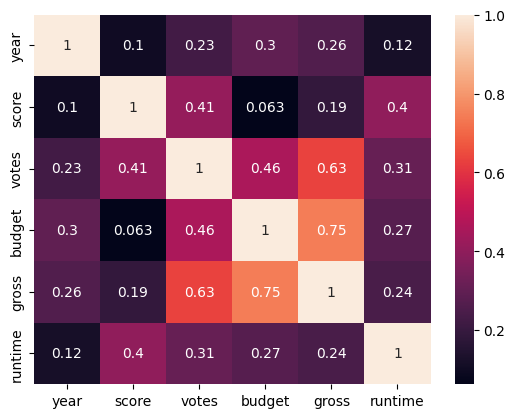

In [48]:
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [49]:
df_numerized=df
for col in df_numerized.columns:
    if(df_numerized[col].dtype=='object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162.0
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181.0
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194.0
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,2995,6.1,2900.0,1918,1259,2112,54,21000000,1672,1829,87.0
2906,4338,3,5,1996,518,7.4,37000.0,2013,1933,1473,11,21000000,1605,327,110.0
3818,3319,6,4,2000,1103,6.5,5200.0,717,1104,2268,54,21000000,1400,463,103.0
7580,4600,3,5,2019,1814,5.2,735.0,1423,2176,2228,55,21000000,682,1948,93.0


In [ ]:
# bugdet and gross have the highest correlation 